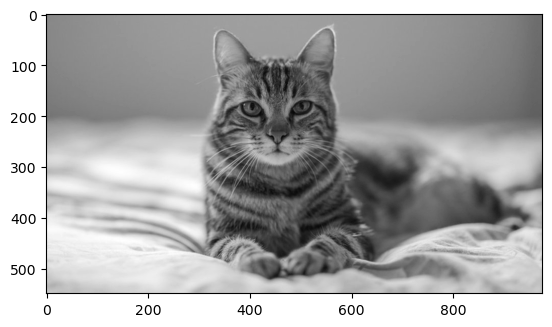

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider, FloatLogSlider, IntSlider
import cv2

image_path = '../images/cat.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

In [52]:
def gabor(x, y, x0, y0, theta, beta_x, beta_y, alpha, f, phi):
    xp = (x - x0) * np.cos(theta) + (y - y0) * np.sin(theta)
    yp = -(x - x0) * np.sin(theta) + (y - y0) * np.cos(theta)
    envelope = alpha * np.exp(-0.5 * (beta_x * xp**2 + beta_y * yp**2))
    carrier = np.cos(2 * np.pi * f * xp + phi)
    return envelope * carrier

def plot_gabor_with_effect(x0=0, y0=0, theta=0, beta_x=1, beta_y=1, alpha=1, f=0.5, phi=0, kernel_size=50):
    # Compute Gabor filter kernel
    kernel_center = kernel_size // 2
    kernel_min = -kernel_center
    kernel_max = kernel_size - kernel_center
    x = y = range(kernel_min, kernel_max)
    X, Y = np.meshgrid(x, y)
    G = gabor(X, Y, x0, y0, theta, beta_x, beta_y, alpha, f, phi)

    # Visualize the gabor filter
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(G, extent=(kernel_min, kernel_max, kernel_min, kernel_max), origin='lower')
    plt.colorbar()
    plt.title('Gabor Filter')

    # Apply the gabor filter to the image
    filtered_img = cv2.filter2D(image, -1, G)

    # Show the filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')

    plt.show()

In [53]:
interactive_plot = interactive(plot_gabor_with_effect,
                               x0=FloatSlider(min=-10, max=10, step=0.5, value=0),
                               y0=FloatSlider(min=-10, max=10, step=0.5, value=0),
                               theta=FloatSlider(min=0, max=np.pi, step=np.pi/16, value=2),
                               beta_x=FloatLogSlider(min=-3, max=1, step=0.01, value=0.1, base=10),
                               beta_y=FloatLogSlider(min=-3, max=1, step=0.01, value=0.03, base=10),
                               alpha=FloatSlider(min=0.1, max=10, step=0.1, value=3),
                               f=FloatLogSlider(min=-2, max=1, step=0.05, value=0.15, base=10),
                               phi=FloatSlider(min=0, max=2*np.pi, step=np.pi/16, value=0),
                               kernel_size=IntSlider(min=2, max=100, step=1, value=20))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='x0', max=10.0, min=-10.0, step=0.5), FloatSlider(val…